# Context – Drunk Smurfs
Among all international hotel guests, Smurfs are burdened with the upkeep of a singular reputation: they are (supposedly) the rowdiest bunch one can entertain, and are equally well-known for unbridled spending as for racking up extensive costs in damages to hotel infrastructure, staff, and occasionally also other guests – costs which typically cannot be recovered once the guest has sought out the safety of his (or her) homeland.
It is your job as a data scientist to screen applying Smurfs clients for an exclusive hotel in the Bahamas - yes, it's the kind of hotel you need to apply for!
# The data
At your disposal is a training set containing data about the behavior of 5000 Smurf hotel guests (train_V2.csv). This data set contains information about the profit the hotel made during their last visit (excluding damages), but also whether they caused damages during their last visit, and for what amount. These outcomes are respectively called 'outcome_profit', 'outcome_damage_inc', and 'outcome_damage_amount'. To predict them, you have access to a host of personal information: previous history of profits and damages, use of hotel facilities, socio-demographics and behavioral scores from the staff of other hotels within the hotel chains. A minor description of features is available in dictionary.csv.
You also get information on the 500 applicants for the 2024 season (score.csv). It is your job to return a list of 150 clients that offer an attractive balance between projected profit for the hotel, and anticipated damages. 
You will notice the data set contains a large number of oddities. You are expected to think yourself about what is intuitive and acceptable in terms of approach, and to provide some minor reflection on this in your technical report. 


# Possible approach
To generate a client list, you can (but don't have to) follow the next steps:
1)	prepare the data set	
* briefly survey the data
* deal with data issues:
* appropriate handle categorical data
* treat missing data
* identify outliers, and choose whether to make your analysis more robust by removing these
2)	predict the projected revenue per clients
* choose an algorithm, and train it in an optimal way
* score the 500 applicants
3)	predict which clients will cause damage
* choose an algorithm, and train it in an optimal way
* score the 500 applicants
4)	for those that will wreak havoc, predict the amount of damage they will cause
* choose an algorithm, and train it in an optimal way
* score the 500 applicants
5)	create a measure of the expected value of each applicant, and create an optimal selection of 200 guests


## 0. Loading packages and dataset

In [1212]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

plt.style.use('seaborn-darkgrid')   

C:\Users\Joery\AppData\Local\Temp\ipykernel_8704\1617307288.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


In [1213]:
# read in data
train = pd.read_csv('train_V2.csv')
score = pd.read_csv('score.csv')
#dictionary = pd.read_csv('dictionary.csv')

## 1. Data exploration

1. and 2: number of features and observations

In [1214]:
train.shape

(5000, 53)

In [1215]:

# correlation matrix
corr_matrix = train.corr()
print(corr_matrix)
# Geen variabelen die een correlatie van 1 hebben dus op basis daarvan moeten we geen variabelen weglaten.


                       income_am  profit_last_am  profit_am  damage_am  \
income_am               1.000000        0.716032   0.685038   0.102339   
profit_last_am          0.716032        1.000000   0.424888   0.099840   
profit_am               0.685038        0.424888   1.000000   0.164160   
damage_am               0.102339        0.099840   0.164160   1.000000   
damage_inc              0.022713        0.046216   0.146981   0.622453   
crd_lim_rec             0.112643        0.058381   0.208033   0.288919   
credit_use_ic           0.043790        0.068244   0.114818   0.101889   
gluten_ic               0.158987        0.115330   0.167896   0.037240   
lactose_ic              0.287967        0.139112   0.404624   0.017174   
insurance_ic            0.006980        0.017561   0.058299   0.173917   
spa_ic                  0.000436        0.004509   0.038036   0.021302   
empl_ic                -0.018407       -0.008958  -0.016365   0.015352   
cab_requests            0.055035      

C:\Users\Joery\AppData\Local\Temp\ipykernel_8704\449586712.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train.corr()


# Check for constant variables

In [1216]:
# There are no constant variables so we do not need to ommit any based on this information.
constant_columns = [col for col in train.columns if train[col].nunique() == 1]
print(constant_columns)


[]


In [1217]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
income_am,4947.0,2281.260158,8365.254507,0.000000e+00,229.000000,469.000000,1688.000000,360577.000000
profit_last_am,4947.0,696.057712,3051.119275,0.000000e+00,0.000000,52.000000,810.000000,150537.000000
profit_am,4947.0,3637.900950,5726.625669,0.000000e+00,1638.000000,1889.000000,3165.500000,100577.000000
damage_am,4954.0,145.952967,581.068095,0.000000e+00,0.000000,0.000000,0.000000,14866.000000
damage_inc,4947.0,0.352335,0.889449,0.000000e+00,0.000000,0.000000,0.000000,10.000000
crd_lim_rec,4947.0,3298.716394,4549.646039,0.000000e+00,0.000000,1500.000000,5000.000000,30000.000000
credit_use_ic,4947.0,0.041237,0.198858,0.000000e+00,0.000000,0.000000,0.000000,1.000000
gluten_ic,4947.0,0.024661,0.155107,0.000000e+00,0.000000,0.000000,0.000000,1.000000
lactose_ic,4947.0,0.094199,0.292134,0.000000e+00,0.000000,0.000000,0.000000,1.000000
insurance_ic,4947.0,0.390944,0.488011,0.000000e+00,0.000000,0.000000,1.000000,1.000000


In [1218]:
train[0:500].T

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
income_am,227.0,268.0,283.0,227.0,4091.0,5108.0,13293.0,227.0,229.0,229.0,...,275.0,3655.0,227.0,3611.0,227.0,1564.0,1928.0,1010.0,1186.0,227.0
profit_last_am,0.0,16.0,23.0,0.0,1028.0,289.0,28.0,0.0,810.0,810.0,...,20.0,1441.0,0.0,1371.0,0.0,2656.5,20.0,243.0,403.0,0.0
profit_am,3201.0,1682.0,1673.0,1685.0,3425.0,6280.0,14704.0,1620.0,1620.0,1620.0,...,1630.0,2185.0,1620.0,2181.0,1620.0,5313.0,7426.0,1819.0,1771.0,1910.0
damage_am,888.0,0.0,0.0,0.0,785.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
damage_inc,6.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
crd_lim_rec,15000.0,750.0,750.0,0.0,14000.0,0.0,15000.0,0.0,0.0,0.0,...,0.0,0.0,15000.0,4000.0,0.0,0.0,0.0,7000.0,4500.0,4000.0
credit_use_ic,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
gluten_ic,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
lactose_ic,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
insurance_ic,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


3. Check for datatypes

In [1219]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 53 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   income_am              4947 non-null   float64
 1   profit_last_am         4947 non-null   float64
 2   profit_am              4947 non-null   float64
 3   damage_am              4954 non-null   float64
 4   damage_inc             4947 non-null   float64
 5   crd_lim_rec            4947 non-null   float64
 6   credit_use_ic          4947 non-null   float64
 7   gluten_ic              4947 non-null   float64
 8   lactose_ic             4947 non-null   float64
 9   insurance_ic           4947 non-null   float64
 10  spa_ic                 4970 non-null   float64
 11  empl_ic                4999 non-null   float64
 12  cab_requests           4912 non-null   float64
 13  married_cd             5000 non-null   bool   
 14  bar_no                 4947 non-null   float64
 15  spor

4. and 5. Check for missing data

In [1220]:
#Here we check how many missing values we have per variable.

train.isnull().sum()[train.isnull().sum() != 0]

income_am             53
profit_last_am        53
profit_am             53
damage_am             46
damage_inc            53
crd_lim_rec           53
credit_use_ic         53
gluten_ic             53
lactose_ic            53
insurance_ic          53
spa_ic                30
empl_ic                1
cab_requests          88
bar_no                53
sport_ic              53
neighbor_income      239
age                   53
marketing_permit      53
urban_ic              53
dining_ic             88
presidential          88
client_segment        53
sect_empl             53
prev_stay             53
prev_all_in_stay      53
divorce               53
fam_adult_size        53
children_no           53
tenure_mts           392
tenure_yrs           392
company_ic            53
claims_no             53
claims_am             27
nights_booked         53
gender                53
shop_am               53
shop_use              88
retired               53
gold_status           53
score1_pos          3775


In [1221]:
#here we look at what percentage of the observations are not NaN per variable

(5000- train.isnull().sum()[train.isnull().sum() != 0])/5000*100

income_am           98.94
profit_last_am      98.94
profit_am           98.94
damage_am           99.08
damage_inc          98.94
crd_lim_rec         98.94
credit_use_ic       98.94
gluten_ic           98.94
lactose_ic          98.94
insurance_ic        98.94
spa_ic              99.40
empl_ic             99.98
cab_requests        98.24
bar_no              98.94
sport_ic            98.94
neighbor_income     95.22
age                 98.94
marketing_permit    98.94
urban_ic            98.94
dining_ic           98.24
presidential        98.24
client_segment      98.94
sect_empl           98.94
prev_stay           98.94
prev_all_in_stay    98.94
divorce             98.94
fam_adult_size      98.94
children_no         98.94
tenure_mts          92.16
tenure_yrs          92.16
company_ic          98.94
claims_no           98.94
claims_am           99.46
nights_booked       98.94
gender              98.94
shop_am             98.94
shop_use            98.24
retired             98.94
gold_status 

## b) Look at the data


In [1222]:
#here we look at the first 16 variables
train.iloc[:,0:16].head()

,income_am,profit_last_am,profit_am,damage_am,damage_inc,crd_lim_rec,credit_use_ic,gluten_ic,lactose_ic,insurance_ic,spa_ic,empl_ic,cab_requests,married_cd,bar_no,sport_ic
0,227.0,0.0,3201.0,888.0,6.0,15000.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,True,2.0,1.0
1,268.0,16.0,1682.0,0.0,0.0,750.0,0.0,0.0,0.0,1.0,1.0,0.0,7.0,True,3.0,0.0
2,283.0,23.0,1673.0,0.0,0.0,750.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,True,4.0,0.0
3,227.0,0.0,1685.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,True,8.0,1.0
4,4091.0,1028.0,3425.0,785.0,2.0,14000.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,False,2.0,1.0


In [1223]:
#here we look at the variables starting from the 16th just to see what the data looks like
train.iloc[:,16:53].head()

,neighbor_income,age,marketing_permit,urban_ic,dining_ic,presidential,client_segment,sect_empl,prev_stay,prev_all_in_stay,...,score2_neg,score3_pos,score3_neg,score4_pos,score4_neg,score5_pos,score5_neg,outcome_profit,outcome_damage_inc,outcome_damage_amount
0,28936.0,37.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,0.838147,0.082288,NaN,NaN,1791.66,0,0.00
1,16674.0,18.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,7.955259,1672.78,1,829.66
2,32552.0,21.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.099529,NaN,NaN,NaN,NaN,0.101955,1.743020,1001.40,0,0.00
3,32252.0,37.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,NaN,NaN,0.889793,NaN,NaN,NaN,NaN,1785.59,0,0.00
4,29605.0,26.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,...,NaN,0.330503,0.766294,0.490486,0.542445,NaN,NaN,3140.74,0,0.00


## Plot the data

<Axes: xlabel='count', ylabel='gender'>

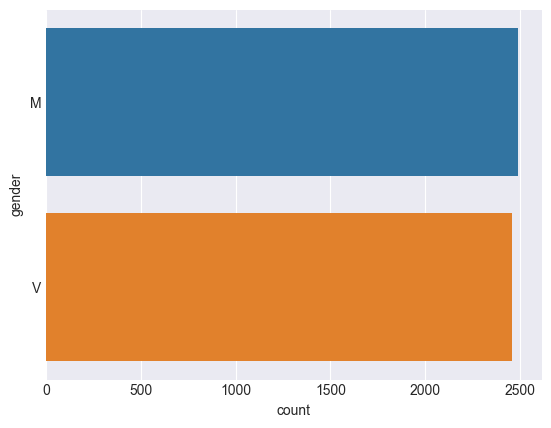

In [1224]:
# Look at the amount of men and women with a bar chart
sns.countplot(y=train["gender"])

C:\Users\Joery\AppData\Local\Temp\ipykernel_8704\2512075102.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = train.corr()


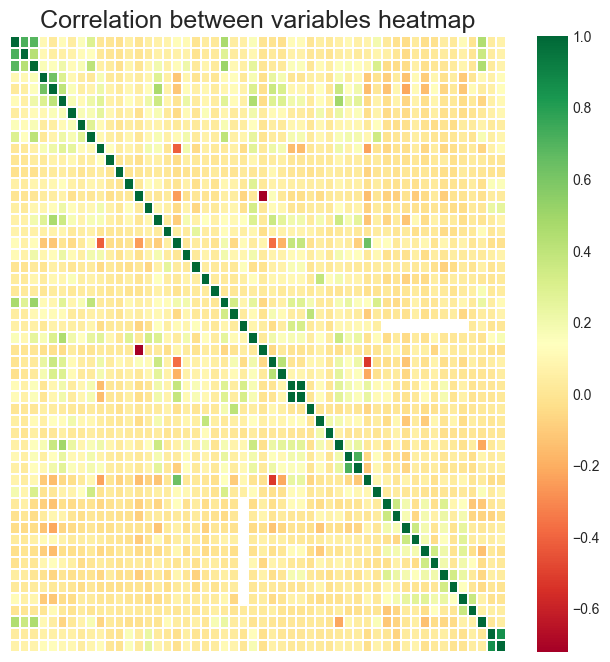

In [1225]:
corrmat = train.corr()

fig, ax = plt.subplots(figsize=(8,8))

# Add title to the Heat map
title = "Correlation between variables heatmap"

# Set the font size and the distance of the title from the plot
plt.title(title,fontsize=18)
ttl = ax.title
ttl.set_position([0.5,1.05])

# Hide ticks for X & Y axis
ax.set_xticks([])
ax.set_yticks([])

# Remove the axes
ax.axis('off')

sns.heatmap(corrmat,fmt="",cmap='RdYlGn',linewidths=0.30,ax=ax)

plt.show()


In [1226]:
# sns.set()
# features = train.copy()
# features = features.drop(["outcome_damage_inc"], 1)
# xvars = features.columns
# sns.pairplot(train, y_vars=['outcome_damage_inc'], x_vars=(xvars[0:5]))
# sns.pairplot(train, y_vars=['outcome_damage_inc'], x_vars=(xvars[5:10]))
# sns.pairplot(train, y_vars=['outcome_damage_inc'], x_vars=(xvars[10:15]))
# sns.pairplot(train, y_vars=['outcome_damage_inc'], x_vars=(xvars[15:20]))
# sns.pairplot(train, y_vars=['outcome_damage_inc'], x_vars=(xvars[20:25]))
# sns.pairplot(train, y_vars=['outcome_damage_inc'], x_vars=(xvars[25:30]))
# sns.pairplot(train, y_vars=['outcome_damage_inc'], x_vars=(xvars[30:35]))
# sns.pairplot(train, y_vars=['outcome_damage_inc'], x_vars=(xvars[35:40]))
# sns.pairplot(train, y_vars=['outcome_damage_inc'], x_vars=(xvars[40:45]))
# sns.pairplot(train, y_vars=['outcome_damage_inc'], x_vars=(xvars[45:50]))
# sns.pairplot(train, y_vars=['outcome_damage_inc'], x_vars=(xvars[50:53]))

# plt.show()

In [1227]:
# sns.set()
# features = train.copy()
# features = features.drop(["outcome_profit"], 1)
# xvars = features.columns
# sns.pairplot(train, y_vars=['outcome_profit'], x_vars=(xvars[0:5]))
# sns.pairplot(train, y_vars=['outcome_profit'], x_vars=(xvars[5:10]))
# sns.pairplot(train, y_vars=['outcome_profit'], x_vars=(xvars[10:15]))
# sns.pairplot(train, y_vars=['outcome_profit'], x_vars=(xvars[15:20]))
# sns.pairplot(train, y_vars=['outcome_profit'], x_vars=(xvars[20:25]))
# sns.pairplot(train, y_vars=['outcome_profit'], x_vars=(xvars[25:30]))
# sns.pairplot(train, y_vars=['outcome_profit'], x_vars=(xvars[30:35]))
# sns.pairplot(train, y_vars=['outcome_profit'], x_vars=(xvars[35:40]))
# sns.pairplot(train, y_vars=['outcome_profit'], x_vars=(xvars[40:45]))
# sns.pairplot(train, y_vars=['outcome_profit'], x_vars=(xvars[45:50]))
# sns.pairplot(train, y_vars=['outcome_profit'], x_vars=(xvars[50:53]))

# plt.show()

In [1228]:
# sns.set()
# features = train.copy()
# features = features.drop(["outcome_damage_amount"], 1)
# xvars = features.columns
# sns.pairplot(train, y_vars=['outcome_damage_amount'], x_vars=(xvars[0:5]))
# sns.pairplot(train, y_vars=['outcome_damage_amount'], x_vars=(xvars[5:10]))
# sns.pairplot(train, y_vars=['outcome_damage_amount'], x_vars=(xvars[10:15]))
# sns.pairplot(train, y_vars=['outcome_damage_amount'], x_vars=(xvars[15:20]))
# sns.pairplot(train, y_vars=['outcome_damage_amount'], x_vars=(xvars[20:25]))
# sns.pairplot(train, y_vars=['outcome_damage_amount'], x_vars=(xvars[25:30]))
# sns.pairplot(train, y_vars=['outcome_damage_amount'], x_vars=(xvars[30:35]))
# sns.pairplot(train, y_vars=['outcome_damage_amount'], x_vars=(xvars[35:40]))
# sns.pairplot(train, y_vars=['outcome_damage_amount'], x_vars=(xvars[40:45]))
# sns.pairplot(train, y_vars=['outcome_damage_amount'], x_vars=(xvars[45:50]))
# sns.pairplot(train, y_vars=['outcome_damage_amount'], x_vars=(xvars[50:53]))

# plt.show()

In [1229]:
# calculate the Z-score of each data point
z_scores = np.abs((train['outcome_damage_amount'] - train['outcome_damage_amount'].mean()) / train['outcome_damage_amount'].std())

# identify outliers as data points with a Z-score greater than 3
outliers = train[z_scores > 3]

# print the number of outliers
print(len(outliers["outcome_damage_amount"]))





92


In [1230]:
# calculate the Z-score of each data point
z_scores = np.abs((train['outcome_profit'] - train['outcome_profit'].mean()) / train['outcome_profit'].std())

# identify outliers as data points with a Z-score greater than 3
outliers = train[z_scores > 3]

# print the number of outliers
print(len(outliers["outcome_profit"]))

72


In [1231]:
# calculate the Z-score of each data point
z_scores = np.abs((train['outcome_damage_inc'] - train['outcome_damage_inc'].mean()) / train['outcome_damage_inc'].std())

# identify outliers as data points with a Z-score greater than 3
outliers = train[z_scores > 3]

# print the number of outliers
print(len(outliers["outcome_damage_inc"]))

0


In [1232]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 53 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   income_am              4947 non-null   float64
 1   profit_last_am         4947 non-null   float64
 2   profit_am              4947 non-null   float64
 3   damage_am              4954 non-null   float64
 4   damage_inc             4947 non-null   float64
 5   crd_lim_rec            4947 non-null   float64
 6   credit_use_ic          4947 non-null   float64
 7   gluten_ic              4947 non-null   float64
 8   lactose_ic             4947 non-null   float64
 9   insurance_ic           4947 non-null   float64
 10  spa_ic                 4970 non-null   float64
 11  empl_ic                4999 non-null   float64
 12  cab_requests           4912 non-null   float64
 13  married_cd             5000 non-null   bool   
 14  bar_no                 4947 non-null   float64
 15  spor

## c) Look at the descriptives
1. For which features do you suspect outliers?
2. Which of these outliers seem most suspicious? Which would you certainly check if you were able to?

In [1233]:
train.iloc[:,0:16].head()

,income_am,profit_last_am,profit_am,damage_am,damage_inc,crd_lim_rec,credit_use_ic,gluten_ic,lactose_ic,insurance_ic,spa_ic,empl_ic,cab_requests,married_cd,bar_no,sport_ic
0,227.0,0.0,3201.0,888.0,6.0,15000.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,True,2.0,1.0
1,268.0,16.0,1682.0,0.0,0.0,750.0,0.0,0.0,0.0,1.0,1.0,0.0,7.0,True,3.0,0.0
2,283.0,23.0,1673.0,0.0,0.0,750.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,True,4.0,0.0
3,227.0,0.0,1685.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,True,8.0,1.0
4,4091.0,1028.0,3425.0,785.0,2.0,14000.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,False,2.0,1.0


2. Convert categorical

In [1234]:
# Deze variabele is een boolean maar moet een getal worden

train['married_cd'] = train['married_cd'].astype('int')
train.loc[:, 'married_cd']

score['married_cd'] = score['married_cd'].astype('int')

## Clean the data

1. Drop duplicates

In [1235]:
train = train.drop_duplicates()
train.head()

,income_am,profit_last_am,profit_am,damage_am,damage_inc,crd_lim_rec,credit_use_ic,gluten_ic,lactose_ic,insurance_ic,...,score2_neg,score3_pos,score3_neg,score4_pos,score4_neg,score5_pos,score5_neg,outcome_profit,outcome_damage_inc,outcome_damage_amount
0,227.0,0.0,3201.0,888.0,6.0,15000.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.838147,0.082288,NaN,NaN,1791.66,0,0.00
1,268.0,16.0,1682.0,0.0,0.0,750.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,7.955259,1672.78,1,829.66
2,283.0,23.0,1673.0,0.0,0.0,750.0,0.0,0.0,0.0,1.0,...,0.099529,NaN,NaN,NaN,NaN,0.101955,1.743020,1001.40,0,0.00
3,227.0,0.0,1685.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.889793,NaN,NaN,NaN,NaN,1785.59,0,0.00
4,4091.0,1028.0,3425.0,785.0,2.0,14000.0,0.0,0.0,1.0,0.0,...,NaN,0.330503,0.766294,0.490486,0.542445,NaN,NaN,3140.74,0,0.00


2. Replace all NaN values with '-1'

In [1236]:
# Replace all NaN values with a specified value (e.g., 0)
train.fillna(-1, inplace=True)
train.head()

score.fillna(-1, inplace=True)

In [1237]:
na = train.isna()
columns_with_na = train.columns[na.any()].tolist() 
print(len(columns_with_na))

0


3. Drop irrelvant columns

gluten_ic and lactose_ic: The fact that a person is gluten or lactose intolerant does not indicate how likely it is for them to inflict damages or how much money they will be spending in the hotel. Maybe they will pay a tiny bit more for food without those ingredients but it shouldn't have a significant impact.

cab_requests: The hotel is very unlikely to own the cab company so wether or not they buy a lot of taxis will not influence the profit for the hotel.

marketing_permit: The choice on wether or not the marketing team may contact them will not influence how much money they will be spending nor how likely they are to inflict damages.

region: Although region could be a small factor due to cultural diferences in spending and personal traits, this could lead to discrimination of people of a certain region.

gender: Here it could also be that a cerain gender is for example more aggressive than others and thus more likely to inflict damages, but this could also lead to discrimination based on generalisations.

divorce: Being divorced or not does not impact the way you behave or spend money, definitely not if some time has passed. Maybe the first months they could be a bit more aggressive or impulsive due to their grief.

In [1238]:
# drop the columns that are not needed
train = train.drop(['gluten_ic', 'lactose_ic', 'marketing_permit','divorce', 'cab_requests', 'urban_ic', 'gender'], axis=1) #outcome_damage_inc, outcome_damage_amount
score = score.drop(['gluten_ic', 'lactose_ic', 'marketing_permit', 'divorce', 'cab_requests', 'urban_ic', 'gender'], axis=1)

 I make sure all three categorical features are classified as 'object' to be able to check if they are categorical

4. Remove unwanted outliers


No unwanted outliers found

## 2. Machine Learning 


Train the different ML models to predict projected revenue


### 2.0.1 Lineair Regression

In [1239]:
# # Dit algoritme heeft een score van 0.2842767456180185
# # Split the dataset into training and testing sets

# X = train
# X = X.drop(['outcome_damage_amount', 'outcome_damage_inc', 'outcome_profit'], axis=1)
# y = train['outcome_profit']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Standardize the features
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# # Train a linear regression model
# model = LinearRegression()
# model.fit(X_train, y_train)

# # Evaluate the model on the testing set
# testScore = model.score(X_test, y_test)
# print('R^2 score on testing set:', testScore)

# # Predict the projected revenue for the 500 applicants

# score = scaler.transform(score)
# predictions = model.predict(score)

# # Sort the predictions in descending order
# sorted_index = np.argsort(predictions)[::-1]
# sorted_predictions = predictions[sorted_index]

# print(sorted_predictions)


### 2.0.2 KNN 

In [1240]:
# # Heeft een score van 0.025000182087153267
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.metrics import r2_score

# #TODO
# # Split the dataset into training and testing sets
# X = train
# X = X.drop(['outcome_damage_amount', 'outcome_damage_inc', 'outcome_profit'], axis=1)
# y = train['outcome_profit']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Standardize the features
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# # Train a linear regression model
# model = KNeighborsRegressor(n_neighbors=5)
# model.fit(X_train, y_train)

# # Make predictions on the testing set
# y_pred = model.predict(X_test)

# # Evaluate the model using r-squared score
# r2 = r2_score(y_test, y_pred)
# print('R-squared score:', r2)

# # Predict the projected revenue for the 500 applicants

# score = scaler.transform(score)
# predictions = model.predict(score)

# # Sort the predictions in descending order
# sorted_index = np.argsort(predictions)[::-1]
# sorted_predictions = predictions[sorted_index]

# print(sorted_predictions)

### 2.0.3 Decision Tree

In [1241]:
# # Dit algoritme heeft een score van 0.5646249872330892
# from sklearn.tree import DecisionTreeRegressor

# # Split the dataset into training and testing sets
# X = train
# X = X.drop(['outcome_damage_amount', 'outcome_damage_inc', 'outcome_profit'], axis=1)
# y = train['outcome_profit']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Standardize the features
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# # Create a decision tree regressor object
# dt_regressor = DecisionTreeRegressor(random_state=0)

# # Fit the regressor with the training data
# dt_regressor.fit(X_train, y_train)

# # Predict the revenue on the testing data
# y_pred_dt = dt_regressor.predict(X_test)

# # Compute R^2 score on the testing data
# r2_score_dt = dt_regressor.score(X_test, y_test)
# print("R^2 Score (Decision Tree Regression): ", r2_score_dt)


# # Predict the projected revenue for the 500 applicants

# score = scaler.transform(score)
# predictions = model.predict(score)

# # Sort the predictions in descending order
# sorted_index = np.argsort(predictions)[::-1]
# sorted_predictions = predictions[sorted_index]

# print(sorted_predictions)

### 2.0.4 Random Forest 

In [1242]:
# # Dit algoritme heeft een score van 0.7581997911409797
# from sklearn.ensemble import RandomForestRegressor

# # Split the dataset into training and testing sets
# X = train
# X = X.drop(['outcome_damage_amount', 'outcome_damage_inc', 'outcome_profit'], axis=1)
# y = train['outcome_profit']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Standardize the features
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# # Instantiate the model
# rf = RandomForestRegressor(n_estimators=100, random_state=42)

# # Fit the model to the training data
# rf.fit(X_train, y_train)

# # Predict on the test data
# y_pred = rf.predict(X_test)

# # Evaluate the model using r2 score
# from sklearn.metrics import r2_score
# r2 = r2_score(y_test, y_pred)
# print("r2 score on test set:", r2)

# # Predict the projected revenue for the 500 applicants

# score = scaler.transform(score)
# predictions = model.predict(score)

# # Sort the predictions in descending order
# sorted_index = np.argsort(predictions)[::-1]
# sorted_predictions = predictions[sorted_index]

# print(sorted_predictions)


r2 score on test set: 0.7581997911409797
[17846.23930946 11656.47511537  9757.39631447  8993.66221965
  8632.62538971  6937.95027024  6701.6313718   6626.91248729
  5696.83395194  5422.13312826  5096.13705375  4388.45170801
  4104.83206359  4058.5580197   4033.22972892  3988.19228134
  3961.12130323  3840.81679253  3682.67951193  3644.02737093
  3434.3115353   3305.26270993  3292.67570399  3224.77584496
  3209.85267486  3183.03755976  3182.03116039  3178.56116212
  3178.01261751  3150.32380139  3118.86096875  3111.97489783
  3108.27960084  3097.86462032  3080.58879213  3037.7089059
  2992.00036057  2944.68168403  2939.71958793  2935.0078479
  2908.19224837  2905.5782214   2903.78753045  2899.95832351
  2894.62213765  2886.67047926  2867.65556991  2860.76156046
  2842.19121397  2828.70591461  2821.90510002  2791.38637017
  2774.21360632  2762.7970799   2755.08146563  2742.47843079
  2727.09734796  2692.54001034  2670.37019244  2638.06078216
  2597.32120846  2590.50660105  2586.78539373 

### 2.0.5 Gradient Boosting

In [1243]:
# # Dit algoritme heeft een score van 0.771681378659433
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.metrics import r2_score

# # Split the dataset into training and testing sets
# X = train
# X = X.drop(['outcome_damage_amount', 'outcome_damage_inc', 'outcome_profit'], axis=1)
# y = train['outcome_profit']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Standardize the features
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# # Instantiate the model
# model = GradientBoostingRegressor()

# # Fit the model on the training data
# model.fit(X_train, y_train)

# # Make predictions on the testing data
# y_pred = model.predict(X_test)

# # Calculate the R-squared score on the testing data
# # r2 = r2_score(y_test, y_pred)
# # print("R-squared score on testing data:", r2)

# # Predict the projected revenue for the 500 applicants

# score = scaler.transform(score)
# predictions = model.predict(score)

# # Sort the predictions in descending order
# sorted_index = np.argsort(predictions)[::-1]
# sorted_predictions = predictions[sorted_index]

# print(sorted_predictions)

[3362.4398629  3027.54848201 3019.50948947 3010.44316598 2996.49824914
 2989.66793367 2969.66374457 2947.36871681 2940.6829894  2940.6829894
 2936.23512247 2932.64399686 2932.64399686 2930.77918847 2919.90775708
 2918.04294869 2918.04294869 2918.04294869 2918.04294869 2913.67387244
 2910.66312417 2910.66312417 2910.66312417 2897.92688439 2897.47140235
 2897.47140235 2897.26771638 2897.26771638 2897.26771638 2892.89864013
 2884.73516257 2884.73516257 2884.73516257 2884.73516257 2884.73516257
 2884.73516257 2884.73516257 2884.73516257 2870.36560773 2869.50662669
 2867.62984655 2867.62984655 2867.62984655 2865.13310028 2863.95993026
 2863.95993026 2863.95993026 2863.95993026 2860.21774385 2851.84147501
 2848.73139437 2848.37663549 2838.89690385 2834.73615898 2831.97047943
 2820.46829327 2813.96092666 2807.73205349 2807.73205349 2790.62673746
 2786.95682117 2786.95682117 2786.95682117 2782.43333018 2782.11106806
 2782.11106806 2782.11106806 2780.64838647 2779.80364563 2769.85150515
 2760.4

c:\Users\Joery\.virtualenvs\project_venv-7qiVcfMQ\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# 2.1 Damages

Score the 500 applicants

### 2.1.1 Decision Tree

In [1244]:
# from random import Random
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.model_selection import cross_val_score

# # split into train and test sets
# X = train
# X = X.drop(['outcome_damage_amount', 'outcome_damage_inc', 'outcome_profit'], axis=1)
# y = train['damage_inc']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# # standardize numerical features
# num_feat = X_train.select_dtypes(include=['int64', 'float64']).columns
# num_feat = [feat for feat in num_feat if feat in X_train.columns and feat in score.columns] # remove non-existent features
# scaler = StandardScaler()
# scaler.fit(X_train[num_feat])
# X_train_stand = X_train.copy()
# X_test_stand = X_test.copy()
# X_train_stand[num_feat] = scaler.transform(X_train[num_feat])
# X_test_stand[num_feat] = scaler.transform(X_test[num_feat])

# # fit decision tree regressor with cross-validation
# depth = np.arange(1, 50)
# cv_scores = []
# sd_scores = []
# for d in depth:
#     dec_tree = DecisionTreeRegressor(random_state=0, max_depth=d)
#     scores = cross_val_score(dec_tree, X_train_stand, y_train, cv=5)
#     cv_scores.append(scores.mean())
#     sd_scores.append(np.sqrt(scores.var())/np.sqrt(5))

# # fit decision tree regressor to entire training set
# dec_tree.fit(X_train_stand, y_train)

# # Standardize numerical features for new applicants
# num_feat = [feat for feat in num_feat if feat in score.columns] # remove non-existent features
# new_applicants_stand = score.copy()
# new_applicants_stand[num_feat] = scaler.transform(score[num_feat])

# # Predict damages for new applicants using the trained decision tree regressor
# damages_pred = dec_tree.predict(new_applicants_stand)
# print(damages_pred)

### 2.1.3 Gradient Boosting

In [1245]:
# from random import Random
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.model_selection import cross_val_score

# # split into train and test sets
# X = train
# X = X.drop(['outcome_damage_amount', 'outcome_damage_inc', 'outcome_profit'], axis=1)
# y = train['damage_inc']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# # standardize numerical features
# num_feat = X_train.select_dtypes(include=['int64', 'float64']).columns
# num_feat = [feat for feat in num_feat if feat in X_train.columns and feat in score.columns] # remove non-existent features
# scaler = StandardScaler()
# scaler.fit(X_train[num_feat])
# X_train_stand = X_train.copy()
# X_test_stand = X_test.copy()
# X_train_stand[num_feat] = scaler.transform(X_train[num_feat])
# X_test_stand[num_feat] = scaler.transform(X_test[num_feat])

# # fit decision tree regressor with cross-validation
# depth = np.arange(1, 50)
# cv_scores = []
# sd_scores = []
# for d in depth:
#     dec_tree = DecisionTreeRegressor(random_state=0, max_depth=d)
#     scores = cross_val_score(dec_tree, X_train_stand, y_train, cv=5)
#     cv_scores.append(scores.mean())
#     sd_scores.append(np.sqrt(scores.var())/np.sqrt(5))

# # fit decision tree regressor to entire training set
# dec_tree.fit(X_train_stand, y_train)

# # Standardize numerical features for new applicants
# num_feat = [feat for feat in num_feat if feat in score.columns] # remove non-existent features
# new_applicants_stand = score.copy()
# new_applicants_stand[num_feat] = scaler.transform(score[num_feat])

# # Predict damages for new applicants using the trained decision tree regressor
# damages_pred = dec_tree.predict(new_applicants_stand)
# print(damages_pred)


### 2.1.4 KNN

In [1246]:
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.model_selection import cross_val_score

# # split into train and test sets
# X = train
# X = X.drop(['outcome_damage_amount', 'outcome_damage_inc', 'outcome_profit'], axis=1)
# y = train['damage_inc']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# # standardize numerical features
# num_feat = X_train.select_dtypes(include=['int64', 'float64']).columns
# num_feat = [feat for feat in num_feat if feat in X_train.columns and feat in score.columns] # remove non-existent features
# scaler = StandardScaler()
# scaler.fit(X_train[num_feat])
# X_train_stand = X_train.copy()
# X_test_stand = X_test.copy()
# X_train_stand[num_feat] = scaler.transform(X_train[num_feat])
# X_test_stand[num_feat] = scaler.transform(X_test[num_feat])

# # fit KNN regressor with cross-validation
# k_values = np.arange(1, 50)
# cv_scores = []
# sd_scores = []
# for k in k_values:
#     knn = KNeighborsRegressor(n_neighbors=k)
#     scores = cross_val_score(knn, X_train_stand, y_train, cv=5)
#     cv_scores.append(scores.mean())
#     sd_scores.append(np.sqrt(scores.var())/np.sqrt(5))

# # fit KNN regressor to entire training set
# knn = KNeighborsRegressor(n_neighbors=5)
# knn.fit(X_train_stand, y_train)

# # Standardize numerical features for new applicants
# num_feat = [feat for feat in num_feat if feat in score.columns] # remove non-existent features
# new_applicants_stand = score.copy()
# new_applicants_stand[num_feat] = scaler.transform(score[num_feat])

# # Predict damages for new applicants using the trained KNN regressor
# damages_pred = knn.predict(new_applicants_stand)
# print(damages_pred)


## 2.1.5 Lineair Regression

In [1247]:
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LinearRegression

# # split into train and test sets
# X = train
# X = X.drop(['outcome_damage_amount', 'outcome_damage_inc', 'outcome_profit'], axis=1)
# y = train['damage_inc']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# # standardize numerical features
# num_feat = X_train.select_dtypes(include=['int64', 'float64']).columns
# num_feat = [feat for feat in num_feat if feat in X_train.columns] # remove non-existent features
# scaler = StandardScaler()
# scaler.fit(X_train[num_feat])
# X_train_stand = X_train.copy()
# X_test_stand = X_test.copy()
# X_train_stand[num_feat] = scaler.transform(X_train[num_feat])
# X_test_stand[num_feat] = scaler.transform(X_test[num_feat])

# # fit linear regression model
# lin_reg = LinearRegression()
# lin_reg.fit(X_train_stand, y_train)

# # Standardize numerical features for new applicants
# new_applicants_stand = score.copy()
# new_applicants_stand[num_feat] = scaler.transform(score[num_feat])

# # Predict damages for new applicants using the trained linear regression model
# damages_pred = lin_reg.predict(new_applicants_stand)
# print(damages_pred)


### 2.1.6 Random Forest 

In [1248]:
# from random import Random
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import cross_val_score

# # split into train and test sets
# X = train
# X = X.drop(['outcome_damage_amount', 'outcome_damage_inc', 'outcome_profit'], axis=1)
# y = train['damage_inc']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# # standardize numerical features
# num_feat = X_train.select_dtypes(include=['int64', 'float64']).columns
# num_feat = [feat for feat in num_feat if feat in X_train.columns and feat in score.columns] # remove non-existent features
# scaler = StandardScaler()
# scaler.fit(X_train[num_feat])
# X_train_stand = X_train.copy()
# X_test_stand = X_test.copy()
# X_train_stand[num_feat] = scaler.transform(X_train[num_feat])
# X_test_stand[num_feat] = scaler.transform(X_test[num_feat])

# # fit random forest regressor with cross-validation
# depth = np.arange(1, 50)
# cv_scores = []
# sd_scores = []
# for d in depth:
#     rnd_forest = RandomForestRegressor(random_state=0, n_estimators=100, max_depth=d)
#     scores = cross_val_score(rnd_forest, X_train_stand, y_train, cv=5)
#     cv_scores.append(scores.mean())
#     sd_scores.append(np.sqrt(scores.var())/np.sqrt(5))

# # fit random forest regressor to entire training set
# rnd_forest.fit(X_train_stand, y_train)

# # Standardize numerical features for new applicants
# num_feat = [feat for feat in num_feat if feat in score.columns] # remove non-existent features
# new_applicants_stand = score.copy()
# new_applicants_stand[num_feat] = scaler.transform(score[num_feat])

# # Predict damages for new applicants using the trained random forest regressor
# damages_pred = rnd_forest.predict(new_applicants_stand)
# print(damages_pred) 


# 2.2 Predict damage amount

In [1249]:
 # TODO
 # Use all ML algorithms to predict damages:
    # - Linear Regression x
    # - Decision Tree x
    # - KNN x
    # - Random Forest x
    # - Gradient Boosting

### 2.2.1 Gradient Boosting

In [1250]:
# from random import Random
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.model_selection import cross_val_score

# # split into train and test sets
# X = train
# X = X.drop(['outcome_damage_amount', 'outcome_damage_inc', 'outcome_profit'], axis=1)
# y = train['damage_am']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# # standardize numerical features
# num_feat = X_train.select_dtypes(include=['int64', 'float64']).columns
# num_feat = [feat for feat in num_feat if feat in X_train.columns and feat in score.columns] # remove non-existent features
# scaler = StandardScaler()
# scaler.fit(X_train[num_feat])
# X_train_stand = X_train.copy()
# X_test_stand = X_test.copy()
# X_train_stand[num_feat] = scaler.transform(X_train[num_feat])
# X_test_stand[num_feat] = scaler.transform(X_test[num_feat])

# # fit Gradient Boosting regressor with cross-validation
# depth = np.arange(1, 50)
# cv_scores = []
# sd_scores = []
# for d in depth:
#     gb_regressor = GradientBoostingRegressor(random_state=0, n_estimators=100, max_depth=d)
#     scores = cross_val_score(gb_regressor, X_train_stand, y_train, cv=5)
#     cv_scores.append(scores.mean())
#     sd_scores.append(np.sqrt(scores.var())/np.sqrt(5))

# # fit Gradient Boosting regressor to entire training set
# gb_regressor.fit(X_train_stand, y_train)

# # Standardize numerical features for new applicants
# num_feat = [feat for feat in num_feat if feat in score.columns] # remove non-existent features
# new_applicants_stand = score.copy()
# new_applicants_stand[num_feat] = scaler.transform(score[num_feat])

# # Predict damages for new applicants using the trained Gradient Boosting regressor
# damages_pred = gb_regressor.predict(new_applicants_stand)
# print(damages_pred)


### 2.2.2 Decision Tree Regressor

In [1251]:
# Decision Tree Regressor
# from random import Random
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.model_selection import cross_val_score

# # split into train and test sets
# X = train
# X = X.drop(['outcome_damage_amount', 'outcome_damage_inc', 'outcome_profit'], axis=1)
# y = train['damage_am']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# # standardize numerical features
# num_feat = X_train.select_dtypes(include=['int64', 'float64']).columns
# num_feat = [feat for feat in num_feat if feat in X_train.columns and feat in score.columns] # remove non-existent features
# scaler = StandardScaler()
# scaler.fit(X_train[num_feat])
# X_train_stand = X_train.copy()
# X_test_stand = X_test.copy()
# X_train_stand[num_feat] = scaler.transform(X_train[num_feat])
# X_test_stand[num_feat] = scaler.transform(X_test[num_feat])

# # fit decision tree regressor with cross-validation
# depth = np.arange(1, 50)
# cv_scores = []
# sd_scores = []
# for d in depth:
#     dec_tree = DecisionTreeRegressor(random_state=0, max_depth=d)
#     scores = cross_val_score(dec_tree, X_train_stand, y_train, cv=5)
#     cv_scores.append(scores.mean())
#     sd_scores.append(np.sqrt(scores.var())/np.sqrt(5))

# # fit decision tree regressor to entire training set
# dec_tree.fit(X_train_stand, y_train)

# # Standardize numerical features for new applicants
# num_feat = [feat for feat in num_feat if feat in score.columns] # remove non-existent features
# new_applicants_stand = score.copy()
# new_applicants_stand[num_feat] = scaler.transform(score[num_feat])

# # Predict damages for new applicants using the trained decision tree regressor
# damages_pred = dec_tree.predict(new_applicants_stand)
# print(damages_pred)

### 2.2.3 KNN

In [1252]:
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.model_selection import cross_val_score

# # split into train and test sets
# X = train
# X = X.drop(['outcome_damage_amount', 'outcome_damage_inc', 'outcome_profit'], axis=1)
# y = train['damage_am']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# # standardize numerical features
# num_feat = X_train.select_dtypes(include=['int64', 'float64']).columns
# num_feat = [feat for feat in num_feat if feat in X_train.columns and feat in score.columns] # remove non-existent features
# scaler = StandardScaler()
# scaler.fit(X_train[num_feat])
# X_train_stand = X_train.copy()
# X_test_stand = X_test.copy()
# X_train_stand[num_feat] = scaler.transform(X_train[num_feat])
# X_test_stand[num_feat] = scaler.transform(X_test[num_feat])

# # fit KNN regressor with cross-validation
# k_values = np.arange(1, 50)
# cv_scores = []
# sd_scores = []
# for k in k_values:
#     knn = KNeighborsRegressor(n_neighbors=k)
#     scores = cross_val_score(knn, X_train_stand, y_train, cv=5)
#     cv_scores.append(scores.mean())
#     sd_scores.append(np.sqrt(scores.var())/np.sqrt(5))

# # fit KNN regressor to entire training set
# knn = KNeighborsRegressor(n_neighbors=5)
# knn.fit(X_train_stand, y_train)

# # Standardize numerical features for new applicants
# num_feat = [feat for feat in num_feat if feat in score.columns] # remove non-existent features
# new_applicants_stand = score.copy()
# new_applicants_stand[num_feat] = scaler.transform(score[num_feat])

# # Predict damages for new applicants using the trained KNN regressor
# damages_pred = knn.predict(new_applicants_stand)
# print(damages_pred)


### 2.2.4 Random Forest

In [1253]:
# from random import Random
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import cross_val_score

# # split into train and test sets
# X = train
# X = X.drop(['outcome_damage_amount', 'outcome_damage_inc', 'outcome_profit'], axis=1)
# y = train['damage_am']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# # standardize numerical features
# num_feat = X_train.select_dtypes(include=['int64', 'float64']).columns
# num_feat = [feat for feat in num_feat if feat in X_train.columns and feat in score.columns] # remove non-existent features
# scaler = StandardScaler()
# scaler.fit(X_train[num_feat])
# X_train_stand = X_train.copy()
# X_test_stand = X_test.copy()
# X_train_stand[num_feat] = scaler.transform(X_train[num_feat])
# X_test_stand[num_feat] = scaler.transform(X_test[num_feat])

# # fit random forest regressor with cross-validation
# depth = np.arange(1, 50)
# cv_scores = []
# sd_scores = []
# for d in depth:
#     rnd_forest = RandomForestRegressor(random_state=0, n_estimators=100, max_depth=d)
#     scores = cross_val_score(rnd_forest, X_train_stand, y_train, cv=5)
#     cv_scores.append(scores.mean())
#     sd_scores.append(np.sqrt(scores.var())/np.sqrt(5))

# # fit random forest regressor to entire training set
# rnd_forest.fit(X_train_stand, y_train)

# # Standardize numerical features for new applicants
# num_feat = [feat for feat in num_feat if feat in score.columns] # remove non-existent features
# new_applicants_stand = score.copy()
# new_applicants_stand[num_feat] = scaler.transform(score[num_feat])

# # Predict damages for new applicants using the trained random forest regressor
# damages_pred = rnd_forest.predict(new_applicants_stand)
# print(damages_pred)


In [1254]:
# TODO
# To select the 200 applicants we will subtract the predicted damages from the predicted revenue
# Test the ML algortihms to determine which one is the best